num_seeds : 250
num_episodes : 1000


/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_61172/3703644069.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  all_rewards = np.array(data['rewards'])  # shape: (num_seeds, num_episodes)


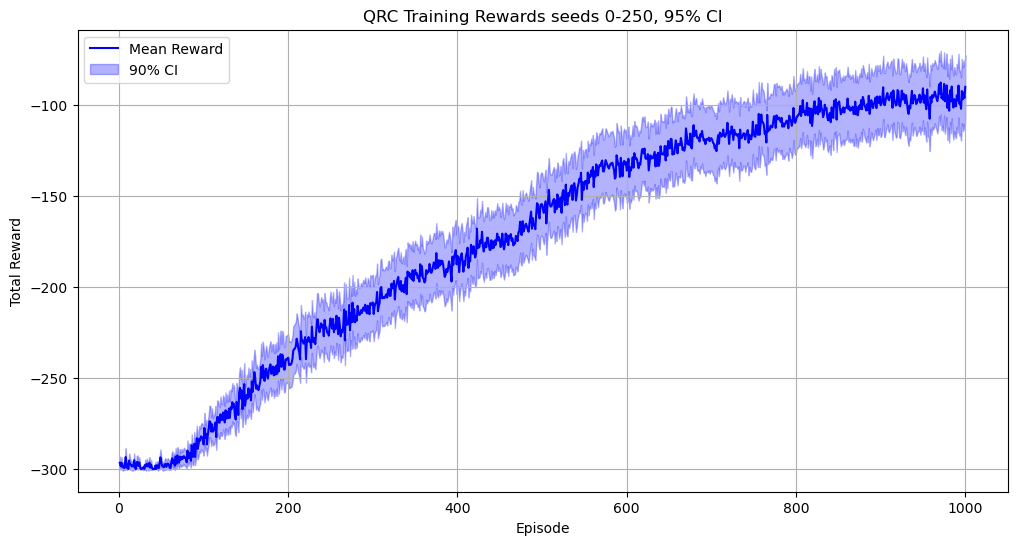

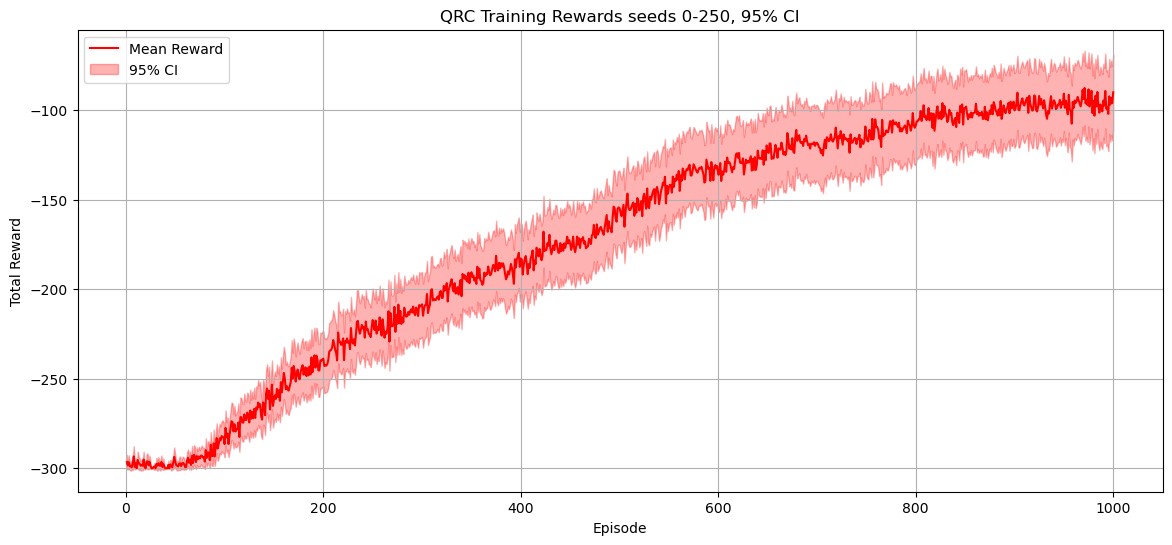

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the saved rewards
os.makedirs("../data", exist_ok=True)

pt_file = "../data/qrc_reward_seeds.pt"
# pt_file = "../data/qrc_reward_seeds_old.pt"
data = torch.load(pt_file)
all_rewards = np.array(data['rewards'])  # shape: (num_seeds, num_episodes)

# Ensure 2D shape
if all_rewards.ndim == 1:
    all_rewards = all_rewards.reshape(1, -1)

num_seeds, num_episodes = all_rewards.shape
print("num_seeds :", num_seeds)
print("num_episodes :", num_episodes)

# Compute mean and std across seeds
mean_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)

episodes = np.arange(1, num_episodes + 1)

# 90% confidence interval
ci_90 = 1.645 * (std_rewards / np.sqrt(num_seeds))
plt.figure(figsize=(12,6))
sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="blue")
plt.fill_between(episodes, mean_rewards - ci_90, mean_rewards + ci_90,
                 alpha=0.3, color="blue", label="90% CI")
plt.title(f"QRC Training Rewards seeds 0-{num_seeds}, 95% CI")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.legend()
plt.show()

# 95% confidence interval
ci_95 = 1.96 * (std_rewards / np.sqrt(num_seeds))
plt.figure(figsize=(14,6))
sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="red")
plt.fill_between(episodes, mean_rewards - ci_95, mean_rewards + ci_95,
                 alpha=0.3, color="red", label="95% CI")
plt.title(f"QRC Training Rewards seeds 0-{num_seeds}, 95% CI")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.legend()
plt.show()


num_seeds : 250
num_episodes : 1000


/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_61172/1770709400.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  all_rewards = np.array(data['rewards'])  # shape: (num_seeds, num_episodes)


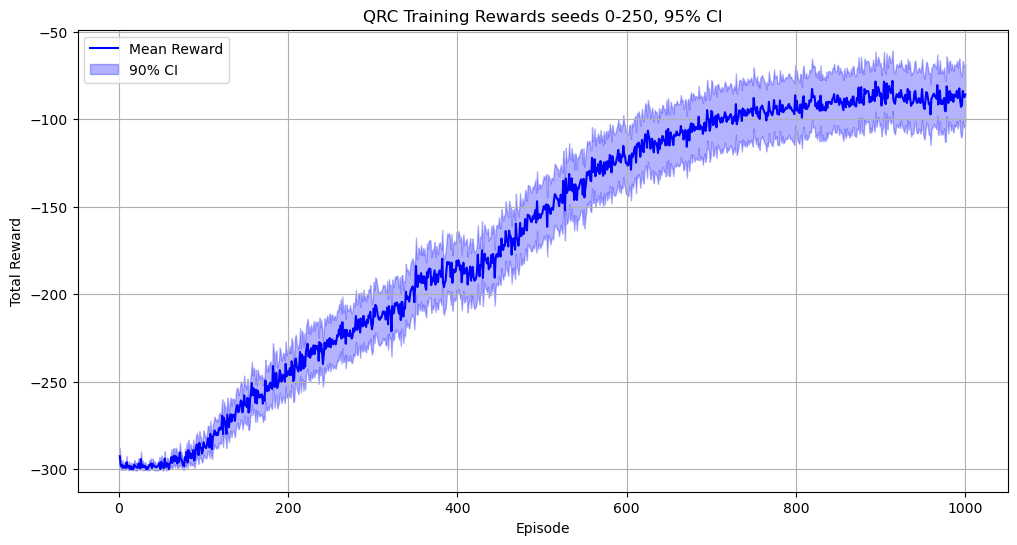

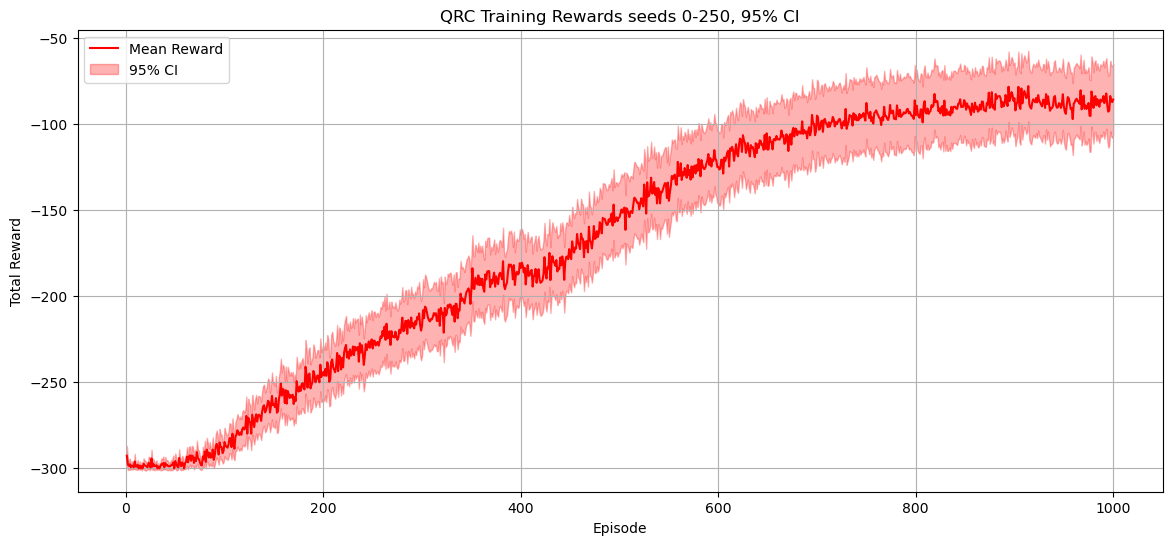

In [6]:
# pt_file = "../data/qrc_reward_seeds.pt"
pt_file = "../data/qrc_reward_seeds_old.pt"
data = torch.load(pt_file)
all_rewards = np.array(data['rewards'])  # shape: (num_seeds, num_episodes)

# Ensure 2D shape
if all_rewards.ndim == 1:
    all_rewards = all_rewards.reshape(1, -1)

num_seeds, num_episodes = all_rewards.shape
print("num_seeds :", num_seeds)
print("num_episodes :", num_episodes)

# Compute mean and std across seeds
mean_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)

episodes = np.arange(1, num_episodes + 1)

# 90% confidence interval
ci_90 = 1.645 * (std_rewards / np.sqrt(num_seeds))
plt.figure(figsize=(12,6))
sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="blue")
plt.fill_between(episodes, mean_rewards - ci_90, mean_rewards + ci_90,
                 alpha=0.3, color="blue", label="90% CI")
plt.title(f"QRC Training Rewards seeds 0-{num_seeds}, 95% CI")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.legend()
plt.show()

# 95% confidence interval
ci_95 = 1.96 * (std_rewards / np.sqrt(num_seeds))
plt.figure(figsize=(14,6))
sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="red")
plt.fill_between(episodes, mean_rewards - ci_95, mean_rewards + ci_95,
                 alpha=0.3, color="red", label="95% CI")
plt.title(f"QRC Training Rewards seeds 0-{num_seeds}, 95% CI")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.legend()
plt.show()

num_seeds : 181
num_episodes : 1000


/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_61172/3037091315.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  all_rewards = np.array(data['rewards'])  # shape: (num_seeds, num_episodes)


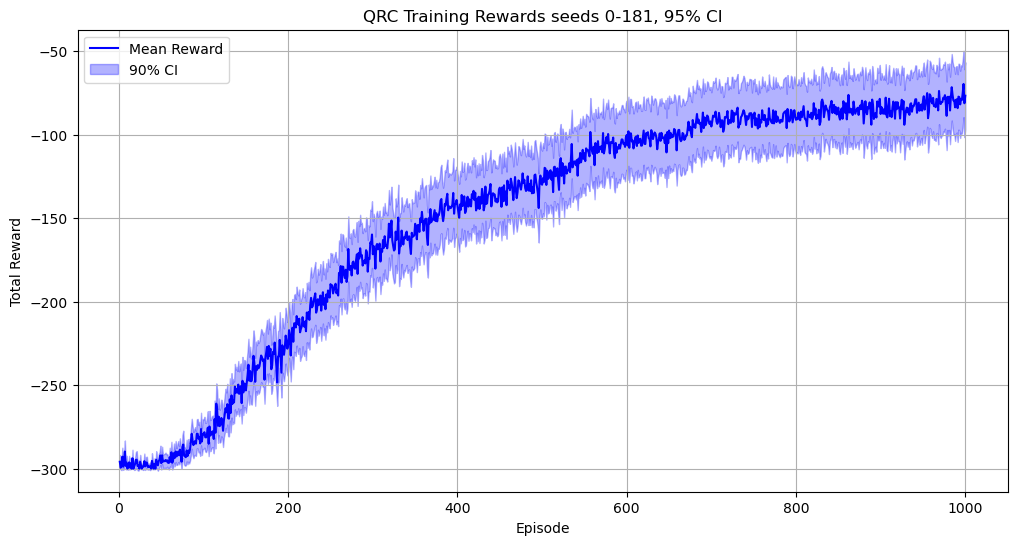

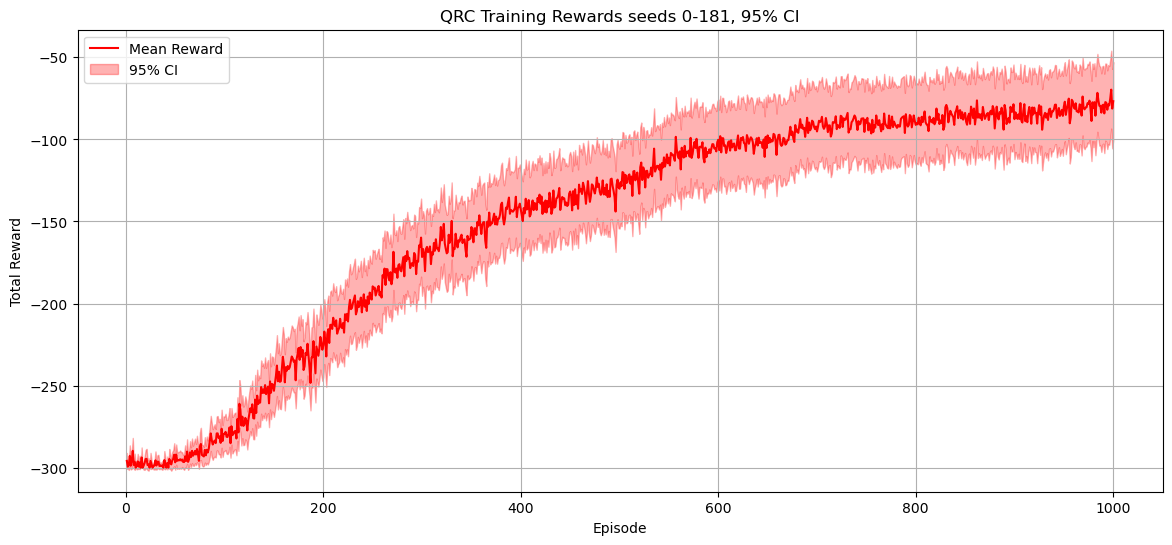

In [7]:
# pt_file = "../data/qrc_reward_seeds.pt"
pt_file = "../data/qrc_reward_seeds_epsilon_1.pt"
data = torch.load(pt_file)
all_rewards = np.array(data['rewards'])  # shape: (num_seeds, num_episodes)

# Ensure 2D shape
if all_rewards.ndim == 1:
    all_rewards = all_rewards.reshape(1, -1)

num_seeds, num_episodes = all_rewards.shape
print("num_seeds :", num_seeds)
print("num_episodes :", num_episodes)

# Compute mean and std across seeds
mean_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)

episodes = np.arange(1, num_episodes + 1)

# 90% confidence interval
ci_90 = 1.645 * (std_rewards / np.sqrt(num_seeds))
plt.figure(figsize=(12,6))
sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="blue")
plt.fill_between(episodes, mean_rewards - ci_90, mean_rewards + ci_90,
                 alpha=0.3, color="blue", label="90% CI")
plt.title(f"QRC Training Rewards seeds 0-{num_seeds}, 95% CI")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.legend()
plt.show()

# 95% confidence interval
ci_95 = 1.96 * (std_rewards / np.sqrt(num_seeds))
plt.figure(figsize=(14,6))
sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="red")
plt.fill_between(episodes, mean_rewards - ci_95, mean_rewards + ci_95,
                 alpha=0.3, color="red", label="95% CI")
plt.title(f"QRC Training Rewards seeds 0-{num_seeds}, 95% CI")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.legend()
plt.show()

/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_61172/635042907.py:24: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  rewards = np.array(data['rewards'])
/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_61172/635042907.py:39: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dqn_rewards = np.array(dqn_data['rewards'])


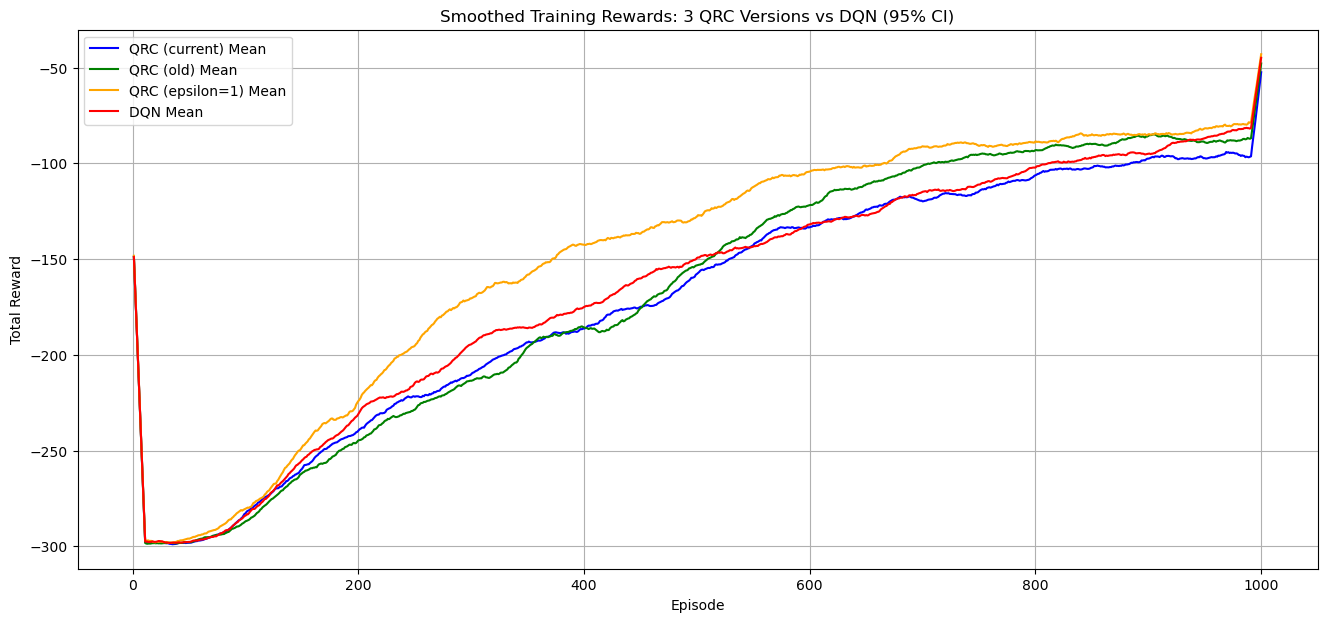

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def moving_average(x, window=20):
    """Compute simple moving average with specified window size."""
    return np.convolve(x, np.ones(window)/window, mode='same')

# Load rewards
os.makedirs("../data", exist_ok=True)

# QRC versions
qrc_files = {
    "QRC (current)": "../data/qrc_reward_seeds.pt",
    "QRC (old)": "../data/qrc_reward_seeds_old.pt",
    "QRC (epsilon=1)": "../data/qrc_reward_seeds_epsilon_1.pt"
}

qrc_data_dict = {}
for name, path in qrc_files.items():
    data = torch.load(path)
    rewards = np.array(data['rewards'])
    if rewards.ndim == 1:
        rewards = rewards.reshape(1, -1)
    num_seeds, num_episodes = rewards.shape
    mean = np.mean(rewards, axis=0)
    std = np.std(rewards, axis=0)
    ci_95 = 1.96 * (std / np.sqrt(num_seeds))
    # Smooth
    mean_smooth = moving_average(mean, window=20)
    ci_smooth = moving_average(ci_95, window=20)
    qrc_data_dict[name] = (mean_smooth, ci_smooth, num_episodes)

# DQN rewards
dqn_file = "../data/dqn_reward_seeds.pt"
dqn_data = torch.load(dqn_file)
dqn_rewards = np.array(dqn_data['rewards'])
if dqn_rewards.ndim == 1:
    dqn_rewards = dqn_rewards.reshape(1, -1)
dqn_num_seeds, dqn_num_episodes = dqn_rewards.shape
dqn_mean = np.mean(dqn_rewards, axis=0)
dqn_std = np.std(dqn_rewards, axis=0)
dqn_ci_95 = 1.96 * (dqn_std / np.sqrt(dqn_num_seeds))
dqn_mean_smooth = moving_average(dqn_mean, window=20)
dqn_ci_smooth = moving_average(dqn_ci_95, window=20)

# Plotting
plt.figure(figsize=(16,7))
colors = ["blue", "green", "orange", "red"]

# Plot QRC versions
for i, (name, (mean_smooth, ci_smooth, num_episodes)) in enumerate(qrc_data_dict.items()):
    episodes = np.arange(1, num_episodes+1)
    sns.lineplot(x=episodes, y=mean_smooth, label=f"{name} Mean", color=colors[i])
    # plt.fill_between(episodes, mean_smooth - ci_smooth, mean_smooth + ci_smooth,
    #                  alpha=0.2, color=colors[i], label=f"{name} 95% CI")

# Plot DQN
episodes = np.arange(1, dqn_num_episodes+1)
sns.lineplot(x=episodes, y=dqn_mean_smooth, label="DQN Mean", color=colors[-1])
# plt.fill_between(episodes, dqn_mean_smooth - dqn_ci_smooth, dqn_mean_smooth + dqn_ci_smooth,
#                  alpha=0.2, color=colors[-1], label="DQN 95% CI")

plt.title("Smoothed Training Rewards: 3 QRC Versions vs DQN (95% CI)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.legend()
plt.show()